Task1.


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import seaborn as sns
import cmasher as cmr
import umap.umap_ as umap
from itertools import product
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import shapiro
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

In [35]:

import plotly.graph_objects as go
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

In [41]:
df = pd.read_csv("/content/df_final.csv")
df

,Name,measurement_error,measurement_method,raw_value_clean,normalised_name,exactmw,amw,lipinskiHBA,lipinskiHBD,NumRotatableBonds_x,...,piPC1,piPC10,piPC2,piPC3,piPC4,piPC5,piPC6,piPC7,piPC8,piPC9
0,silicate,0.04,snowball,1.1700,[O-][Si]([O-])([O-])[O-],91.958779,92.082,4.0,0.0,0.0,...,1.609438,0.000000,1.945910,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,BSG,0.00,el_mylogic,1.4100,[B-](CNS(=O)(=O)CC1=CC=C(C=C1)C(=O)O)(O)(O)O,290.051127,290.082,8.0,5.0,6.0,...,3.258097,4.466626,3.860730,4.029806,4.464470,4.956267,4.963718,5.229101,5.372090,4.298135
2,silica,0.00,snowball,1.4800,O=[Si]=O,59.966756,60.084,2.0,0.0,0.0,...,1.609438,0.000000,1.609438,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,DMF,0.00,el_mylogic,1.4305,CN(C)C=O,73.052764,73.095,2.0,0.0,1.0,...,1.791759,0.000000,1.791759,1.609438,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,silica,0.00,snowball,1.4600,O=[Si]=O,59.966756,60.084,2.0,0.0,0.0,...,1.609438,0.000000,1.609438,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2325,Tetradecyl acetate,0.00,el_cde_tables,1.4362,CCCCCCCCCCCCCCOC(=O)C,256.240230,256.430,2.0,0.0,13.0,...,2.944439,2.302585,2.995732,2.833213,2.772589,2.708050,2.639057,2.564949,2.484907,2.397895
2326,BPA,0.00,el_mylogic,1.3000,CC(C)(C1=CC=C(C=C1)O)C2=CC=C(C=C2)O,228.115030,228.291,2.0,2.0,2.0,...,3.218876,6.196030,3.828641,4.350278,4.826312,5.364222,5.410529,5.537826,5.668371,5.901266
2327,carbon,0.40,el_cde_tables,2.4000,C,16.031300,16.043,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2328,hydrogen,0.00,snowball,2.3500,[HH],2.015650,2.016,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [42]:
df = df.select_dtypes(include = ['float', 'int']).replace([np.inf, -np.inf], np.nan)
df = df.dropna()

In [18]:

scaler = MinMaxScaler()
df_scale = scaler.fit_transform(data)


In [38]:
# display dataset structure with the pandas .info() method
print(data.info())

# show first 5 rows
print(data.head(5))

# display some statistics
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1468 entries, 3 to 2327
Columns: 685 entries, measurement_error to piPC9
dtypes: float64(685)
memory usage: 7.7 MB
None
    measurement_error  raw_value_clean     exactmw      amw  lipinskiHBA  \
3                 0.0           1.4305   73.052764   73.095          2.0   
7                 0.0           1.4050   72.057515   72.107          1.0   
8                 0.0           1.7667  181.050394  181.128          5.0   
9                 0.0           1.3919   73.089149   73.139          1.0   
13                0.0           1.4097  142.172151  142.286          0.0   

    lipinskiHBD  NumRotatableBonds_x  NumHBD  NumHBA  NumHeavyAtoms  ...  \
3           0.0                  1.0     0.0     1.0            5.0  ...   
7           0.0                  0.0     0.0     1.0            5.0  ...   
8           4.0                  4.0     3.0     3.0           11.0  ...   
9           2.0                  2.0     1.0     1.0            5.0  

In [62]:
df_scale

array([[0.        , 0.21376227, 0.07200943, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.20109303, 0.07077441, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.38079742, 0.20602533, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.21659421, 0.29932953, ..., 0.30422412, 0.27388588,
        0.24813225],
       [0.        , 0.1489256 , 0.26442855, ..., 0.6568318 , 0.62476665,
        0.61065822],
       [0.07079646, 0.69544156, 0.00125063, ..., 0.        , 0.        ,
        0.        ]])

In [65]:
df_s = pd.DataFrame(df_scale)
cluster = pd.DataFrame()
cluster.rename(columns = {0  : 'n'}, inplace = True)

In [74]:
df_s.columns = df.columns

In [85]:
df_s['clusters'] = np.nan

In [86]:
df_s

,measurement_error,raw_value_clean,exactmw,amw,lipinskiHBA,lipinskiHBD,NumRotatableBonds_x,NumHBD,NumHBA,NumHeavyAtoms,...,piPC10,piPC2,piPC3,piPC4,piPC5,piPC6,piPC7,piPC8,piPC9,clusters
0,0.000000,0.213762,0.072009,0.072025,0.105263,0.000000,0.066667,0.000,0.066667,0.095238,...,0.000000,0.357118,0.278154,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
1,0.000000,0.201093,0.070774,0.070800,0.052632,0.000000,0.000000,0.000,0.066667,0.095238,...,0.000000,0.357118,0.309665,0.273798,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
2,0.000000,0.380797,0.206025,0.206044,0.263158,0.363636,0.266667,0.375,0.200000,0.238095,...,0.000000,0.597083,0.456101,0.351857,0.344774,0.330396,0.000000,0.000000,0.000000,NaN
3,0.000000,0.194585,0.072055,0.072080,0.052632,0.181818,0.133333,0.125,0.066667,0.095238,...,0.000000,0.276304,0.189870,0.105920,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
4,0.000000,0.203428,0.157781,0.157859,0.000000,0.000000,0.466667,0.000,0.000000,0.214286,...,0.000000,0.437931,0.359384,0.297354,0.248602,0.207315,0.164426,0.121089,0.071726,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,0.000000,0.237446,0.145274,0.145354,0.000000,0.000000,0.000000,0.000,0.000000,0.214286,...,0.000000,0.637531,0.640749,0.637592,0.640077,0.559744,0.518954,0.483416,0.452759,NaN
1464,0.000000,0.268364,0.115447,0.115500,0.052632,0.090909,0.066667,0.125,0.066667,0.166667,...,0.000000,0.581544,0.580464,0.573409,0.575809,0.421221,0.330234,0.000000,0.000000,NaN
1465,0.000000,0.216594,0.299330,0.299458,0.105263,0.000000,0.866667,0.000,0.133333,0.404762,...,0.223995,0.597083,0.489656,0.423678,0.375734,0.339942,0.304224,0.273886,0.248132,NaN
1466,0.000000,0.148926,0.264429,0.264551,0.105263,0.181818,0.133333,0.250,0.133333,0.380952,...,0.602750,0.763091,0.751846,0.737507,0.744271,0.696942,0.656832,0.624767,0.610658,NaN


Оптимизируем данные

In [43]:
scaler = MinMaxScaler()
df_scale = scaler.fit_transform(df)

Create an empty list to store the inertia values for different numbers of clusters.


In [68]:
inertias = []

In [70]:
# Iterate over range of cluster numbers
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(df_s)
    inertias.append(kmeans.inertia_)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

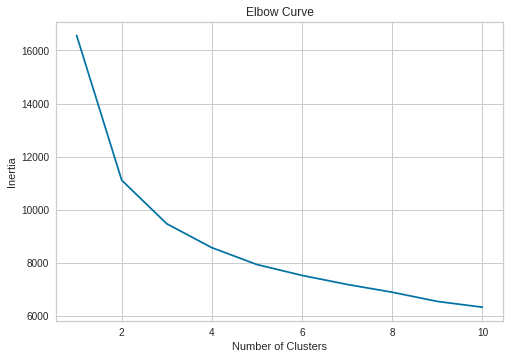

In [71]:
# Plot elbow curve
plt.plot(range(1, 11), inertias)
plt.title("Elbow Curve")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [48]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

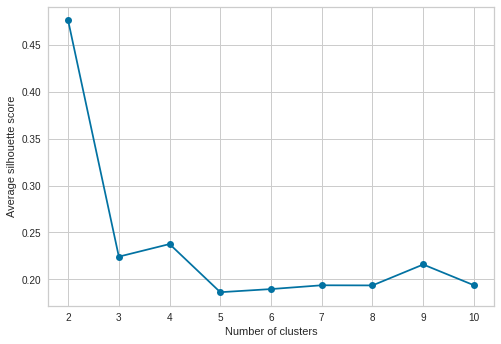

In [72]:
# Loop through different number of clusters and compute the average silhouette score for each
silhouette_avgs = []

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    y_kmeans = kmeans.fit_predict(df_s)
    silhouette_avg = silhouette_score(df_s, y_kmeans)
    silhouette_avgs.append(silhouette_avg)

# Plot the average silhouette scores for each number of clusters
plt.plot(range(2, 11), silhouette_avgs, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Average silhouette score")
plt.show()



код вычисляет среднюю оценку силуэта, используя silhouette_score()функцию из sklearn.metrics. Полученные баллы сохраняются в списке silhouette_avgs. Наивысшая точка считается оптимальным количеством кластеров




In [89]:
#Initialize the K-means algorithm with the chosen number of clusters:
kmeans = KMeans(n_clusters=2)
#Fit the data to the K-means algorithm:
X = data.iloc[:, :685]

kmeans.fit(X)
labels = kmeans.labels_

# Add the cluster labels to the original dataframe:
# Select the same number of rows from X as the number of rows in df_s
df_s['cluster'] = labels[:df_s.shape[0]]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


ValueError: ignored

In [ ]:
#Visualize the clusters:

plt.scatter(df_s['raw_value_clean'], df_s['exactmw'], c=df_s['cluster'])
plt.xlabel('raw_value_clean')
plt.ylabel('exactmw')
plt.show()


In [90]:
from sklearn.cluster import DBSCAN

# Initialize the DBSCAN algorithm with the chosen parameters:
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the data to the DBSCAN algorithm:
X = data.iloc[:, :685]
dbscan.fit(X)

# Get the cluster labels:
labels = dbscan.labels_

# Add the cluster labels to the original dataframe:
df_s['cluster'] = labels


ValueError: ignored